In [1]:
# HW 10-3
# 利用pandas讀取csv檔

import pandas as pd

stockdf = pd.read_csv("dataset.csv", index_col=0)
stockdf.dropna(how="any", inplace=True)

print(stockdf)

             open   high    low  close  volume  diff    ration  real
date                                                                
2016/9/8    84.20  85.20  84.20   85.2    4934  -6.2 -0.072770     0
2016/9/9    83.20  84.90  83.20   84.1    5430  -8.8 -0.104637     0
2016/9/10   82.60  83.00  81.40   82.2    5604   0.6  0.007299     1
2016/9/12   82.30  83.10  81.00   81.0    7212  -1.0 -0.012346     1
2016/9/13   82.50  82.50  79.00   79.0   13706   5.8  0.073418     2
...           ...    ...    ...    ...     ...   ...       ...   ...
2020/10/5   28.75  28.90  28.60   28.9    1988   0.3  0.010381     1
2020/10/6   29.05  29.45  29.00   29.0    3115 -29.0 -1.000000     0
2020/10/7   29.75  29.95  29.35   29.5    7856 -29.5 -1.000000     0
2020/10/8   29.55  29.80  29.20   29.2    3558 -29.2 -1.000000     0
2020/10/12  29.25  29.70  29.10   29.2    3534 -29.2 -1.000000     0

[1000 rows x 8 columns]


In [2]:
# HW 10-4
# 正規化輸入資料

from sklearn import preprocessing
from keras.utils import np_utils

min_max_scaler = preprocessing.MinMaxScaler()
new_df = stockdf.copy()
flag_df = stockdf.copy()

new_df["open"] = min_max_scaler.fit_transform(stockdf.open.values.reshape(-1,1))
new_df["high"] = min_max_scaler.fit_transform(stockdf.high.values.reshape(-1,1))
new_df["low"] = min_max_scaler.fit_transform(stockdf.low.values.reshape(-1,1))
new_df["close"] = min_max_scaler.fit_transform(stockdf.close.values.reshape(-1,1))
new_df["volume"] = min_max_scaler.fit_transform(stockdf.volume.values.reshape(-1,1))

In [3]:
# HW 10-5
# 切割為輸入資料

import numpy as np

data_value = new_df.values
result = []

t_frame = 9
for idx in range(len(data_value)-(t_frame+1)):
    result.append(data_value[idx:idx+(t_frame+1)])

result = np.array(result)
print(result.shape)
print(len(result[0]))
print(result[0])

(990, 10, 8)
10
[[ 8.37375178e-01  8.37563452e-01  8.55895197e-01  8.58511422e-01
   5.37566460e-02 -6.20000000e+00 -7.27699530e-02  0.00000000e+00]
 [ 8.23109843e-01  8.33212473e-01  8.41339156e-01  8.42299189e-01
   5.91606380e-02 -8.80000000e+00 -1.04637337e-01  0.00000000e+00]
 [ 8.14550642e-01  8.05656273e-01  8.15138282e-01  8.14296242e-01
   6.10563933e-02  6.00000000e-01  7.29927000e-03  1.00000000e+00]
 [ 8.10271041e-01  8.07106599e-01  8.09315866e-01  7.96610169e-01
   7.85757866e-02 -1.00000000e+00 -1.23456790e-02  1.00000000e+00]
 [ 8.13124108e-01  7.98404641e-01  7.80203785e-01  7.67133382e-01
   1.49328859e-01  5.80000000e+00  7.34177220e-02  2.00000000e+00]
 [ 7.48930100e-01  7.46192893e-01  7.08879185e-01  7.12601326e-01
   2.76213719e-01  9.30000000e+00  1.23505976e-01  2.00000000e+00]
 [ 7.20399429e-01  8.02755620e-01  7.27802038e-01  8.23139278e-01
   2.38091606e-01  1.50000000e+00  1.81159420e-02  1.00000000e+00]
 [ 8.17403709e-01  8.08556925e-01  7.94759825e-01  7.

In [4]:
# HW 10-6
# 準備訓練集資料
# 訓練集90% 測試集10%

len_of_train = round(0.9*result.shape[0]) # 0.9*990

X_train = result[:int(len_of_train), :-1, 0:5]
y_train = result[:int(len_of_train), -1][:, -1]
y_train_OneHot = np_utils.to_categorical(y_train)

print(X_train.shape)
print(X_train[55])
print(y_train[55])
print(y_train_OneHot[55])

(891, 9, 5)
[[0.84165478 0.84191443 0.84570597 0.84524687 0.11403948]
 [0.84878745 0.85496737 0.8588064  0.84672071 0.09701037]
 [0.83166904 0.81870921 0.82387191 0.81724392 0.06995773]
 [0.81312411 0.80855693 0.81513828 0.8201916  0.05455199]
 [0.82453638 0.81870921 0.83406114 0.82313928 0.04598841]
 [0.78459344 0.78390138 0.79621543 0.78334562 0.15029853]
 [0.78601997 0.77810007 0.79621543 0.78629329 0.07067681]
 [0.78601997 0.79550399 0.78020378 0.80987472 0.10997559]
 [0.80599144 0.79840464 0.80931587 0.79808401 0.0473612 ]]
1.0
[0. 1. 0.]


In [5]:
# HW 10-7
# 準備測試集資料
# 訓練集90% 測試集10%

# len_of_test = round(0.1*result.shape[0]) # 0.9*990

X_test = result[int(len_of_train):, :-1, 0:5]
y_test = result[int(len_of_train):, -1][:, -1]
y_test_OneHot = np_utils.to_categorical(y_test)

print(X_test.shape)
print(X_test[55])
print(y_test[55])
print(y_test_OneHot[55])

(99, 9, 5)
[[0.07631954 0.06091371 0.07714702 0.0560059  0.10002833]
 [0.07774608 0.05221175 0.06768559 0.04568902 0.0837183 ]
 [0.06704708 0.04423495 0.05021834 0.02947679 0.1101935 ]
 [0.05135521 0.03335751 0.05167394 0.0375829  0.05673102]
 [0.06276748 0.04278463 0.06404658 0.04347826 0.0583544 ]
 [0.06419401 0.03915881 0.06113537 0.04347826 0.04721956]
 [0.06562054 0.04205946 0.06404658 0.04274134 0.04590125]
 [0.06562054 0.05148658 0.06695779 0.05011054 0.1086246 ]
 [0.07417974 0.04786077 0.06914119 0.0486367  0.12761483]]
0.0
[1. 0. 0.]


In [6]:
# HW 10-8
# 建立LSTM模型

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM

moooodel = Sequential()
moooodel.add(LSTM(256, input_shape=(9, 5), return_sequences=True, activation='tanh'))
moooodel.add(Dropout(0.5))
moooodel.add(LSTM(128, return_sequences=False, activation='tanh'))
moooodel.add(Dropout(0.5))
moooodel.add(Dense(units=16, activation='relu'))
moooodel.add(Dense(units=3, activation='softmax'))
moooodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 256)            268288    
                                                                 
 dropout (Dropout)           (None, 9, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 467,523
Trainable params: 467,523
Non-trai

In [12]:
moooodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = moooodel.fit(X_train, y_train_OneHot, batch_size=8, epochs=15, validation_split=0.2, verbose=2)
score = moooodel.evaluate(X_test, y_test_OneHot)
print(score[1])

Epoch 1/15
89/89 - 5s - loss: 0.9136 - accuracy: 0.6124 - val_loss: 0.9538 - val_accuracy: 0.6313 - 5s/epoch - 58ms/step
Epoch 2/15
89/89 - 2s - loss: 0.9214 - accuracy: 0.6124 - val_loss: 0.9277 - val_accuracy: 0.6313 - 2s/epoch - 20ms/step
Epoch 3/15
89/89 - 2s - loss: 0.9170 - accuracy: 0.6124 - val_loss: 0.9336 - val_accuracy: 0.6369 - 2s/epoch - 20ms/step
Epoch 4/15
89/89 - 2s - loss: 0.9110 - accuracy: 0.6138 - val_loss: 0.9948 - val_accuracy: 0.5028 - 2s/epoch - 21ms/step
Epoch 5/15
89/89 - 2s - loss: 0.9149 - accuracy: 0.6180 - val_loss: 0.9488 - val_accuracy: 0.5251 - 2s/epoch - 20ms/step
Epoch 6/15
89/89 - 2s - loss: 0.9142 - accuracy: 0.6166 - val_loss: 0.9812 - val_accuracy: 0.5140 - 2s/epoch - 19ms/step
Epoch 7/15
89/89 - 2s - loss: 0.9146 - accuracy: 0.6096 - val_loss: 0.9578 - val_accuracy: 0.5363 - 2s/epoch - 20ms/step
Epoch 8/15
89/89 - 2s - loss: 0.9136 - accuracy: 0.6138 - val_loss: 1.0214 - val_accuracy: 0.4749 - 2s/epoch - 19ms/step
Epoch 9/15
89/89 - 2s - loss: 0.

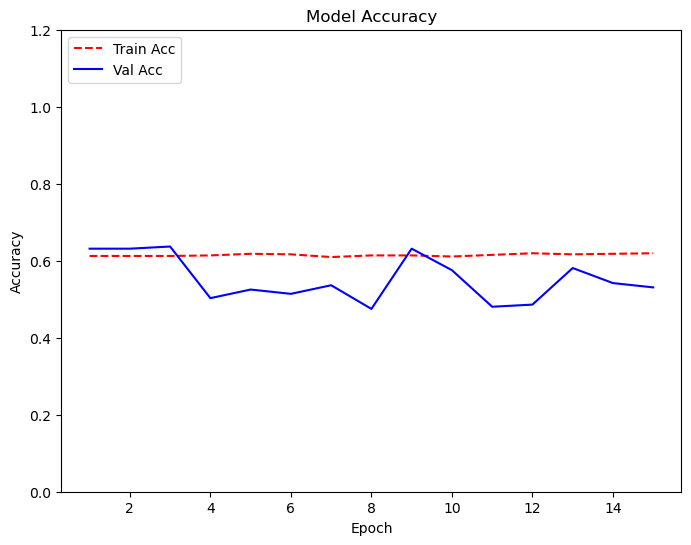

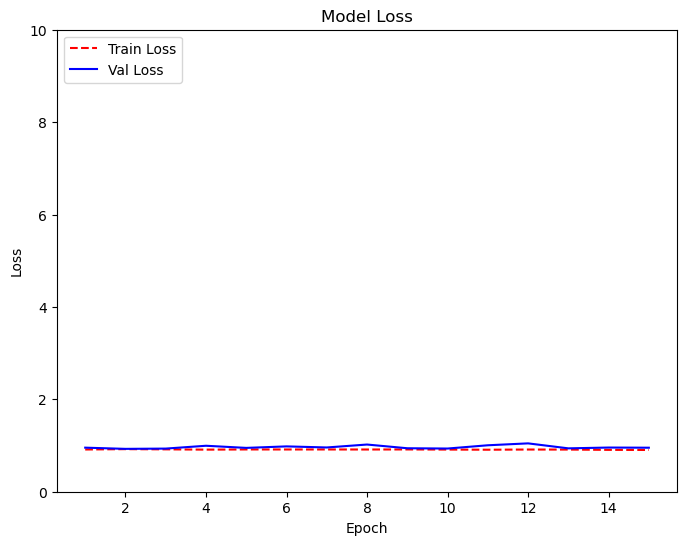

In [13]:
import matplotlib.pyplot as plt
# ----------
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_count = range(1, len(train_acc) + 1)
plt.figure(figsize=(8, 6))
plt.ylim(0.0, 1.2)
plt.plot(epoch_count, train_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.title('Model Accuracy')
plt.legend(['Train Acc', 'Val Acc'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
# ----------
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
plt.figure(figsize=(8, 6))
plt.ylim(0, 10)
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.title('Model Loss')
plt.legend(['Train Loss', 'Val Loss'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

4/4 [==============================] - 1s 13ms/step


Text(0.5, 3.722222222222216, 'Predict label')

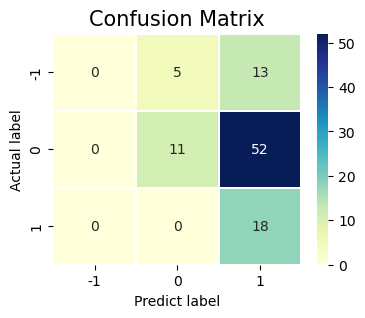

In [14]:
# 給老師參考
# 超漂亮的分類結果混淆矩陣OuO!!!

import sklearn.metrics as skm
import seaborn as sns
# ----------
y_pred = np.argmax(moooodel.predict(X_test), axis=1)
y_true = y_test
cm = skm.confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(4, 3))
labels=[-1, 0, 1]
sns.heatmap(
    cm, xticklabels=labels, yticklabels=labels,
    annot=True, linewidths=0.1, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Actual label')
plt.xlabel('Predict label')

In [29]:
# confusion_matrix_for_labels(y_true, y_pred, labels):
labels=[-1, 1]
cm = skm.confusion_matrix(y_true=y_true, y_pred=y_pred)
indices = [i for i, label in enumerate(cm) if label in labels]
filtered_cm = cm[indices][:, indices]
plt.figure(figsize=(4, 3))
sns.heatmap(
    filtered_cm, xticklabels=labels, yticklabels=labels,
    annot=True, linewidths=0.1, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Actual label')
plt.xlabel('Predict label')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
moooodel.save("LSTMmodel.h5")

In [16]:
from tensorflow.keras.models import load_model
model = load_model("LSTMmodel.h5")
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = y_test
print(y_pred)
print(y_true)

4/4 [==============================] - 1s 13ms/step
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2
 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2]
[1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 2. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 2. 1. 1.
 0. 0. 0.]
